# 1. import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4

# 2. import data

In [3]:
df = pd.read_csv('0 Data/clean_data3.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(7905, 4)

# 3. model data (own price)

In [4]:
X = df[['PriceA', 'PriceB']]
Y = df['YA']
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PriceA,7905.0,2.648067,0.098034,2.11,2.63,2.67,2.70,2.80
PriceB,7905.0,2.153665,0.095304,1.76,2.12,2.16,2.21,2.26


# 4. model (own)

In [5]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)
model_purchase.coef_

array([[-1.37408651,  1.02289828]])

In [6]:
Beta = model_purchase.coef_[0][0]
Beta

-1.3740865124123043

# 5. model data (cross)

In [7]:
X = df[['PriceB', 'PriceA']]
Y = df['YB']
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PriceB,7905.0,2.153665,0.095304,1.76,2.12,2.16,2.21,2.26
PriceA,7905.0,2.648067,0.098034,2.11,2.63,2.67,2.70,2.80


In [8]:
price_range = np.arange(0.5, 3.5, 0.05)
price_range

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
       1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55,
       1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ,
       2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65,
       2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 ,
       3.25, 3.3 , 3.35, 3.4 , 3.45])

In [9]:
df_test = pd.DataFrame(price_range)
df_test = df_test.rename(columns = {0: 'PriceB'})
df_test['PriceA'] = df['PriceA'].mean()
df_test.shape

(60, 2)

# 6. model (cross)

In [10]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)
model_purchase.coef_

array([[-1.02283442,  1.37404382]])

# 7. cross price elasticity

In [11]:
Y_pr = model_purchase.predict_proba(df_test)
Y_pr = Y_pr[:, 1]
Y_pr

array([0.76083319, 0.7514034 , 0.74172803, 0.73181049, 0.72165503,
       0.71126675, 0.70065158, 0.68981634, 0.67876873, 0.66751728,
       0.65607143, 0.64444143, 0.63263837, 0.62067412, 0.60856132,
       0.59631329, 0.58394403, 0.57146813, 0.55890073, 0.54625739,
       0.53355411, 0.52080716, 0.50803306, 0.49524847, 0.48247008,
       0.46971458, 0.45699853, 0.44433826, 0.43174986, 0.41924901,
       0.40685096, 0.39457046, 0.38242164, 0.37041802, 0.35857242,
       0.34689691, 0.33540277, 0.32410049, 0.31299969, 0.30210917,
       0.29143683, 0.2809897 , 0.27077395, 0.2607949 , 0.251057  ,
       0.24156389, 0.23231839, 0.22332255, 0.21457768, 0.20608439,
       0.19784259, 0.18985157, 0.18211005, 0.17461616, 0.16736754,
       0.16036137, 0.15359438, 0.14706292, 0.14076303, 0.13469039])

In [12]:
price_elasticity = -1 * Beta * price_range * Y_pr
price_elasticity

array([0.52272531, 0.5678713 , 0.61151909, 0.6536211 , 0.69413151,
       0.73300653, 0.77020471, 0.80568723, 0.83941826, 0.87136517,
       0.9014989 , 0.92979419, 0.95622983, 0.98078893, 1.00345907,
       1.02423256, 1.0431065 , 1.06008298, 1.07516913, 1.08837712,
       1.09972425, 1.10923285, 1.11693021, 1.12284849, 1.12702457,
       1.12949983, 1.13031992, 1.12953455, 1.12719716, 1.1233646 ,
       1.11809685, 1.11145658, 1.10350887, 1.09432078, 1.08396096,
       1.07249931, 1.06000657, 1.04655396, 1.03221278, 1.01705413,
       1.00114853, 0.98456559, 0.96737378, 0.94964011, 0.93142992,
       0.91280663, 0.89383158, 0.87456383, 0.85506006, 0.83537443,
       0.81555848, 0.79566109, 0.77572839, 0.75580379, 0.73592795,
       0.71613878, 0.69647147, 0.67695856, 0.65762996, 0.63851304])

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

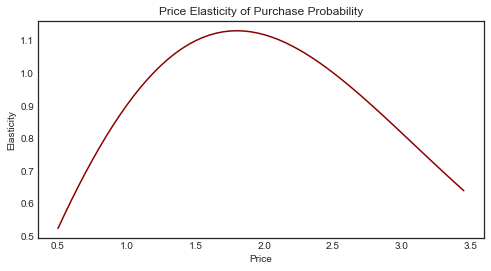

In [13]:
plt.plot(price_range,price_elasticity,color='darkred')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')